# Predictive analysis of stroke risk factors and contributors

---



## Reading the CSV file 

In [275]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [276]:
#reading the csv file 

data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning Data 

In [277]:
#data´s info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [278]:
data.shape

(5110, 12)

The data frame has 5,110 rows and 12 columns

In [279]:
#possible duplicates
data.duplicated().value_counts()

False    5110
dtype: int64

According to the operation above, we found that there are not duplicated values 

In [280]:
#
data['gender'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

Female    58.59%
Male      41.39%
Other      0.02%
Name: gender, dtype: object

<Axes: xlabel='gender'>

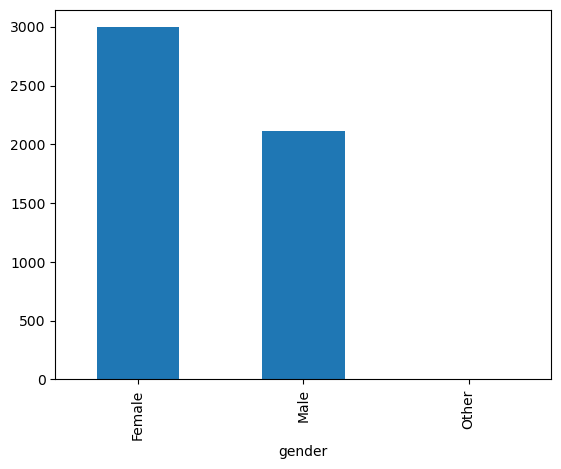

In [281]:
#plot by gender
data.groupby('gender')['gender'].count().plot(kind='bar')

Because we only have one record of "other", we are not able to do a complete general analysis based on one sample.

In [282]:
#for cleaning, we are going to drop the "other" value
data = data[data['gender']!='Other']
data.shape

(5109, 12)

In [283]:
#Checking for NA values

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We decided to drop the missing values to ensure our data is uniform, due to the minimum impact (0.4%) on patient records. 

In [284]:
#With the "isnull" we can see if there are any NA values in the data frame, in this case the column bmi has 201 NA values
#drop NA
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [285]:
#make the id column the index
data = data.set_index('id').sort_values('id', ascending=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0


In [286]:
#Statistics summary of avg glucose level and bmi(Body Mass Index)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Creating a new csv file with the cleaned data 

In [287]:
data.to_csv('./data/dataset_stroke.csv')

# What is the correlation between the variables?

To answer this question let's understand the difference of each variable between patients with stroke ande the general population within the data frame

### References 
- merge data frames : https://www.youtube.com/watch?v=mEmNiPoqKAo&t=238s
- legend outside de chart : https://www.youtube.com/watch?v=b5I3D4eJtKQ
- rename columns : https://www.youtube.com/watch?v=0uBirYFhizE
- converting categorical values into binary : https://www.youtube.com/watch?v=fyHaUMX9y0A
- replacing values in columns = https://www.youtube.com/watch?v=CA4tSV-oJoY&t=153s
- k-means clustering = https://www.youtube.com/watch?v=s6PSSzeUMFk 

In [1]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Importing the cleaned database
data = pd.read_csv('./data/dataset_stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
3,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0


In [3]:
# Create a new data frame only with the Patients who have suffered stroke to compare vs. the original database
data_stroke = data[data.stroke==1]
data_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,210,Male,81.0,0,0,Yes,Self-employed,Rural,91.54,31.4,never smoked,1
26,491,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1
39,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
70,1210,Female,68.0,0,0,Yes,Private,Rural,211.06,39.3,Unknown,1
75,1261,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4822,71673,Female,79.0,0,0,Yes,Private,Urban,110.85,24.1,formerly smoked,1
4830,71796,Female,70.0,0,1,Yes,Private,Rural,59.35,32.3,formerly smoked,1
4844,72081,Female,57.0,1,0,Yes,Govt_job,Rural,67.41,32.9,never smoked,1
4867,72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1


### Let's Start comparing the first attirbute: Work Type

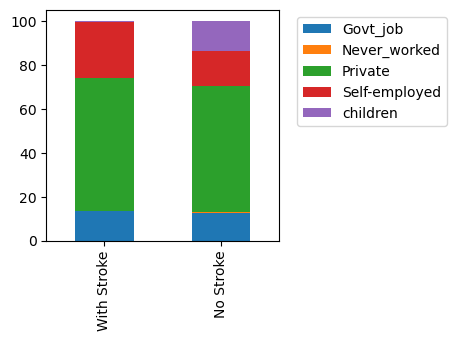

In [4]:
# Filtering Work Type within the Data Frame with only patients with stroke
data_stroke_work = data_stroke['work_type'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_work = pd.DataFrame(data_stroke_work)

# Filtering Work Type within the original Data Frame
data_work = data['work_type'].value_counts(normalize=True).mul(100).round(2)
pd_data_work = pd.DataFrame(data_work)

# Merging both Data Frames
work_type = pd.merge(pd_data_stroke_work,pd_data_work,how="outer",left_index=True,right_index=True)
work_type_renamed = work_type.rename({'work_type_x':'With Stroke','work_type_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization
work_type_trasp = work_type_renamed.T

# Ploting the merged Data Frame
work_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title="Work Type"
plt.show()
#plt.savefig('./data/Work_Type.png')

### Now we can continue the same proces for the rest of the variables

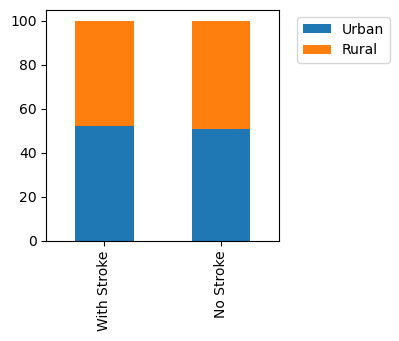

In [5]:
# Filtering Residence Type within the Data Frame with only patients with stroke
data_stroke_residence = data_stroke['Residence_type'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_residence = pd.DataFrame(data_stroke_residence)

# Filtering variable within the original Data Frame
data_residence = data['Residence_type'].value_counts(normalize=True).mul(100).round(2)
pd_data_residence = pd.DataFrame(data_residence)

# Merging both Data Frames
residence_type = pd.merge(pd_data_stroke_residence,pd_data_residence,how="outer",left_index=True,right_index=True)
residence_type_renamed = residence_type.rename({'Residence_type_x':'With Stroke','Residence_type_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization
residence_type_trasp = residence_type_renamed.T

# Ploting the merged Data Frame
residence_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title='Residence Type'
plt.show()
#plt.savefig('./data/Residence Type.png')

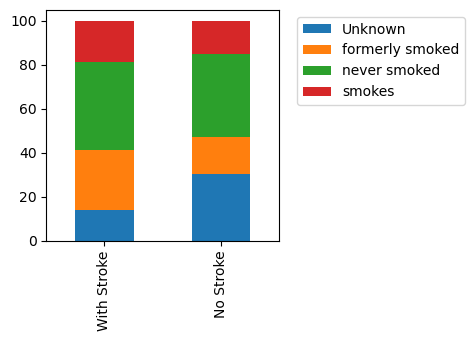

In [6]:
# Filtering Snoking Status within the Data Frame with only patients with stroke
data_stroke_smoking = data_stroke['smoking_status'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_smoking = pd.DataFrame(data_stroke_smoking)

# Filtering variable within the original Data Frame
data_smoking = data['smoking_status'].value_counts(normalize=True).mul(100).round(2)
pd_data_smoking = pd.DataFrame(data_smoking)

# Merging both Data Frames
smoking_type = pd.merge(pd_data_stroke_smoking,pd_data_smoking,how="outer",left_index=True,right_index=True)
smoking_type_renamed = smoking_type.rename({'smoking_status_x':'With Stroke','smoking_status_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization
smoking_type_trasp = smoking_type_renamed.T

# Ploting the merged Data Frame
smoking_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title='Smoking Status'
plt.show()
#plt.savefig('./data/Smoking Status.png')

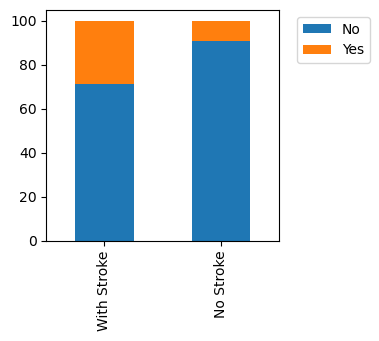

In [7]:
# Filtering Hypertension within the Data Frame with only patients with stroke
data_stroke_hypertension = data_stroke['hypertension'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_hypertension = pd.DataFrame(data_stroke_hypertension)

# Filtering variable within the original Data Frame
data_hypertension = data['hypertension'].value_counts(normalize=True).mul(100).round(2)
pd_data_hypertension = pd.DataFrame(data_hypertension)

# Merging both Data Frames
hypertension_type = pd.merge(pd_data_stroke_hypertension,pd_data_hypertension,how="outer",left_index=True,right_index=True)
hypertension_type_renamed = hypertension_type.rename({'hypertension_x':'With Stroke','hypertension_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization and...
# changing the Ceros & Ones of the coumn names to No & Yes
hypertension_type_trasp = hypertension_type_renamed.T
hyp_cols = ['No','Yes']
hypertension_type_trasp.columns = hyp_cols

# Ploting the merged Data Frame
hypertension_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title='Hypertension'
plt.show()
#plt.savefig('./data/Hypertension.png')

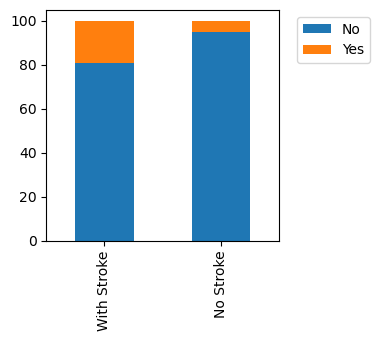

In [8]:
# Filtering Heart Disease within the Data Frame with only patients with stroke
data_stroke_heart_disease = data_stroke['heart_disease'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_heart_disease = pd.DataFrame(data_stroke_heart_disease)

# Filtering variable within the original Data Frame
data_heart_disease = data['heart_disease'].value_counts(normalize=True).mul(100).round(2)
pd_data_heart_disease = pd.DataFrame(data_heart_disease)

# Merging both Data Frames
heart_disease_type = pd.merge(pd_data_stroke_heart_disease,pd_data_heart_disease,how="outer",left_index=True,right_index=True)
heart_disease_type_renamed = heart_disease_type.rename({'heart_disease_x':'With Stroke','heart_disease_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization and...
# changing the Ceros & Ones of the coumn names to No & Yes
heart_disease_type_trasp = heart_disease_type_renamed.T
heart_cols = ['No','Yes']
heart_disease_type_trasp.columns = heart_cols

# Ploting the merged Data Frame
heart_disease_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title='Heart Disease'
plt.show()
#plt.savefig('./data/Heart Disease.png')

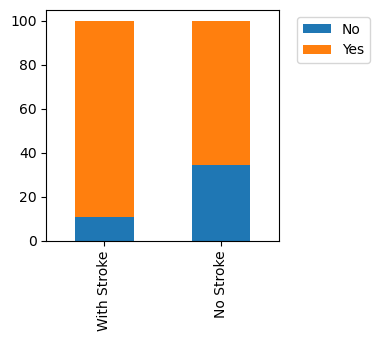

In [9]:
# Filtering Ever Married within the Data Frame with only patients with stroke
data_stroke_married = data_stroke['ever_married'].value_counts(normalize=True).mul(100).round(2)
pd_data_stroke_married = pd.DataFrame(data_stroke_married)

# Filtering variable within the original Data Frame
data_married = data['ever_married'].value_counts(normalize=True).mul(100).round(2)
pd_data_married = pd.DataFrame(data_married)

# Merging both Data Frames
married_type = pd.merge(pd_data_stroke_married,pd_data_married,how="outer",left_index=True,right_index=True)
married_type_renamed = married_type.rename({'ever_married_x':'With Stroke','ever_married_y':'No Stroke'},axis=1)

# Transposing the merged data frame to generate a better visualization and...
# changing the Ceros & Ones of the coumn names to No & Yes
married_type_trasp = married_type_renamed.T
new_col = ['No','Yes']
married_type_trasp = married_type_trasp[new_col]

# Ploting the merged Data Frame
married_type_trasp.plot(kind='bar',stacked = True,figsize=[3,3])
plt.legend(bbox_to_anchor=(1.05,1))
plt.title='Ever Married'
plt.show()
#plt.savefig('./data/Ever Married.png')

### Mean Values for Glocose, BMI & Age
We hve other variables that can not be compared as percentages, so we will get the average to compare between between patients with stroke ande the general population within the data frame 

In [10]:
data_stroke['avg_glucose_level'].mean()

134.57138755980856

In [11]:
data['avg_glucose_level'].mean()

105.29740220048889

In [12]:
data_stroke['bmi'].mean()

30.471291866028704

In [13]:
data['bmi'].mean()

28.894559902200502

In [14]:
data_stroke['age'].mean()

67.71291866028709

In [15]:
data['age'].mean()

42.86881010594948

## Conclusion

Stroke Patients are Overdeveloped in:

- Self Employment
- Formerly Smokers
- Married
- Hypertension
- Heart Disease
- Glucose levels
- Age

Factors balanced vs. Non Stroke: Residence & BMI

With this we still need to do further analysis to identify the most relevant factors

# Can we cluster different attributes to better predict strokes?

To develop this analysis we used the Clustering Method with K-means from the following source: https://www.youtube.com/watch?v=s6PSSzeUMFk

We decided to make clusters within the Stroke patients to identify if there were different patient profiles that could allow us to predict strokes given different sets of conditions 

In [20]:
# Understanding the data to see if we have numeric values to create the clusters
#In the original data we can observe float64: numeric values WITH decimals &
#int64: numeric values WITHOUT decimals
# But we also have objects containing categorical values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.2+ KB


## Applying KMeans to Patients With Stroke

In [21]:
# Using the filtered Storke Patients Data Frame
data_stroke = data[data.stroke==1]
data_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,210,Male,81.0,0,0,Yes,Self-employed,Rural,91.54,31.4,never smoked,1
26,491,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1
39,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
70,1210,Female,68.0,0,0,Yes,Private,Rural,211.06,39.3,Unknown,1
75,1261,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4822,71673,Female,79.0,0,0,Yes,Private,Urban,110.85,24.1,formerly smoked,1
4830,71796,Female,70.0,0,1,Yes,Private,Rural,59.35,32.3,formerly smoked,1
4844,72081,Female,57.0,1,0,Yes,Govt_job,Rural,67.41,32.9,never smoked,1
4867,72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1


In [38]:
# Converting Categorical Values to binary numerical values
# Using the get_dummies method to convert the categorical values into columns and fill each register with 1 & 0

work_stroke = pd.get_dummies(data_stroke['work_type'])
data_work_stroke_split = pd.concat((data_stroke, work_stroke), axis = 1)
data_work_stroke = data_work_stroke_split.drop(['work_type'],axis=1)

gender_stroke = pd.get_dummies(data_stroke['gender'])
data_gender_stroke_split = pd.concat((data_work_stroke, gender_stroke), axis = 1)
data_gender_stroke = data_gender_stroke_split.drop(['gender'],axis=1)

residence_stroke = pd.get_dummies(data_stroke['Residence_type'])
data_residence_stroke_split = pd.concat((data_gender_stroke, residence_stroke), axis = 1)
data_residence_stroke = data_residence_stroke_split.drop(['Residence_type'],axis=1)

smoke_stroke = pd.get_dummies(data_stroke['smoking_status'])
data_smoke_stroke_split = pd.concat((data_residence_stroke, smoke_stroke), axis = 1)

# Droping the stroke colum to avoid including it into the analysis
data_non_categorical_stroke = data_smoke_stroke_split.drop(['smoking_status','stroke'],axis=1)

# Converting Yes & No from "Ever Married" to binary numerical values
data_non_categorical_stroke['ever_married'].replace({'Yes':1,'No':0},inplace=True)

# Validating that now we only have numerical values
data_non_categorical_stroke

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Govt_job,Private,Self-employed,children,Female,Male,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
9,210,81.0,0,0,1,91.54,31.4,0,0,1,0,0,1,1,0,0,0,1,0
26,491,74.0,0,0,1,74.96,26.6,0,0,1,0,1,0,0,1,0,0,1,0
39,712,82.0,1,1,0,84.03,26.5,0,1,0,0,1,0,1,0,0,1,0,0
70,1210,68.0,0,0,1,211.06,39.3,0,1,0,0,1,0,1,0,1,0,0,0
75,1261,54.0,0,0,1,71.22,28.5,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4822,71673,79.0,0,0,1,110.85,24.1,0,1,0,0,1,0,0,1,0,1,0,0
4830,71796,70.0,0,1,1,59.35,32.3,0,1,0,0,1,0,1,0,0,1,0,0
4844,72081,57.0,1,0,1,67.41,32.9,1,0,0,0,1,0,1,0,0,0,1,0
4867,72366,76.0,0,0,1,104.47,20.3,0,1,0,0,0,1,0,1,1,0,0,0


In [42]:
# Converting Categorical Values also in the original database
work = pd.get_dummies(data['work_type'])
data_work_split = pd.concat((data, work), axis = 1)
data_work = data_work_split.drop(['work_type'],axis=1)

gender = pd.get_dummies(data['gender'])
data_gender_split = pd.concat((data_work, gender), axis = 1)
data_gender = data_gender_split.drop(['gender'],axis=1)

residence = pd.get_dummies(data['Residence_type'])
data_residence_split = pd.concat((data_gender, residence), axis = 1)
data_residence = data_residence_split.drop(['Residence_type'],axis=1)

smoke = pd.get_dummies(data['smoking_status'])
data_smoke_split = pd.concat((data_residence, smoke), axis = 1)
data_non_categorical = data_smoke_split.drop(['smoking_status'],axis=1)

data_non_categorical['ever_married'].replace({'Yes':1,'No':0},inplace=True)
data_non_categorical.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,...,Self-employed,children,Female,Male,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,77,13.0,0,0,0,85.81,18.6,0,0,0,...,0,1,1,0,1,0,1,0,0,0
1,84,55.0,0,0,1,89.17,31.5,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,91,42.0,0,0,0,98.53,18.5,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,99,31.0,0,0,0,108.89,52.3,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,129,24.0,0,0,0,97.55,26.2,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [37]:
# Droping the Patient ID for the initial analysis
data_stroke_sin_id = data_non_categorical_stroke.drop(['id'],axis =1)
data_stroke_sin_id

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Govt_job,Private,Self-employed,children,Female,Male,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,KMeans_Clusters2
9,81.0,0,0,1,91.54,31.4,0,0,1,0,0,1,1,0,0,0,1,0,1
26,74.0,0,0,1,74.96,26.6,0,0,1,0,1,0,0,1,0,0,1,0,1
39,82.0,1,1,0,84.03,26.5,0,1,0,0,1,0,1,0,0,1,0,0,1
70,68.0,0,0,1,211.06,39.3,0,1,0,0,1,0,1,0,1,0,0,0,0
75,54.0,0,0,1,71.22,28.5,0,1,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4822,79.0,0,0,1,110.85,24.1,0,1,0,0,1,0,0,1,0,1,0,0,1
4830,70.0,0,1,1,59.35,32.3,0,1,0,0,1,0,1,0,0,1,0,0,1
4844,57.0,1,0,1,67.41,32.9,1,0,0,0,1,0,1,0,0,0,1,0,1
4867,76.0,0,0,1,104.47,20.3,0,1,0,0,0,1,0,1,1,0,0,0,1


In [36]:
#Defining the number of clusters needed: Used the Codo de Jambu method (Elbow Method)
wcss2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, max_iter=300)
    kmeans2.fit(data_stroke_sin_id)
    wcss2.append(kmeans2.inertia_)

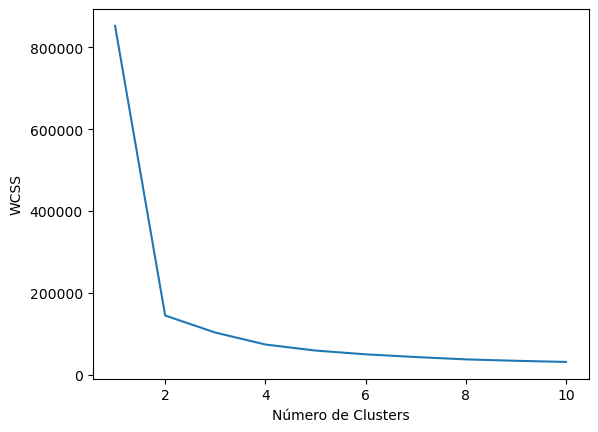

In [35]:
# Ploting the elbow to identify the number of clusters (in this case #2 is the optimal)
plt.plot(range(1,11),wcss2)
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #WCSS es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()
#plt.savefig('./data/Cluster_Number_CodoJambu.png')

In [34]:
# Applying the KMeans method to the Data Base
clustering2 = KMeans(n_clusters = 2, max_iter=300) # Creating the model
clustering2.fit(data_stroke_sin_id) # Applying the model to the Data Base

KMeans(n_clusters=2)

In [33]:
#The resulst are saved within lables_ within the model
data_non_categorical_stroke['KMeans_Clusters2'] = clustering2.labels_ 
new_data_non_categorical_stroke = data_non_categorical_stroke.reset_index()
new_data_non_categorical_stroke

,index,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Govt_job,Private,...,children,Female,Male,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,KMeans_Clusters2
0,9,210,81.0,0,0,1,91.54,31.4,0,0,...,0,0,1,1,0,0,0,1,0,1
1,26,491,74.0,0,0,1,74.96,26.6,0,0,...,0,1,0,0,1,0,0,1,0,1
2,39,712,82.0,1,1,0,84.03,26.5,0,1,...,0,1,0,1,0,0,1,0,0,1
3,70,1210,68.0,0,0,1,211.06,39.3,0,1,...,0,1,0,1,0,1,0,0,0,0
4,75,1261,54.0,0,0,1,71.22,28.5,0,1,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,4822,71673,79.0,0,0,1,110.85,24.1,0,1,...,0,1,0,0,1,0,1,0,0,1
205,4830,71796,70.0,0,1,1,59.35,32.3,0,1,...,0,1,0,1,0,0,1,0,0,1
206,4844,72081,57.0,1,0,1,67.41,32.9,1,0,...,0,1,0,1,0,0,0,1,0,1
207,4867,72366,76.0,0,0,1,104.47,20.3,0,1,...,0,0,1,0,1,1,0,0,0,1


In [32]:
# Main Components Analysis to visualize the that best represent the originals
# We use this because we have to many attirbutes and we cannot creat a plot with all of them

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2_stroke = pca2.fit_transform(data_stroke_sin_id)
pca2_stroke_df = pd.DataFrame(data=pca2_stroke,columns=['Componente_1','Componente_2'])
pca2_stroke_df
pca2_nombres_stroke = pd.concat([pca2_stroke_df,new_data_non_categorical_stroke[['KMeans_Clusters2']]],axis=1)
pca2_nombres_stroke

,Componente_1,Componente_2,KMeans_Clusters2
0,-42.584248,-13.629828,1
1,-59.510373,-8.182799,1
2,-50.224682,-15.817215,1
3,76.720629,3.190833,0
4,-63.740617,11.675046,1
...,...,...,...
204,-23.598194,-12.873616,1
205,-75.020511,-3.333515,1
206,-67.315399,9.633415,1
207,-30.184079,-10.906284,1


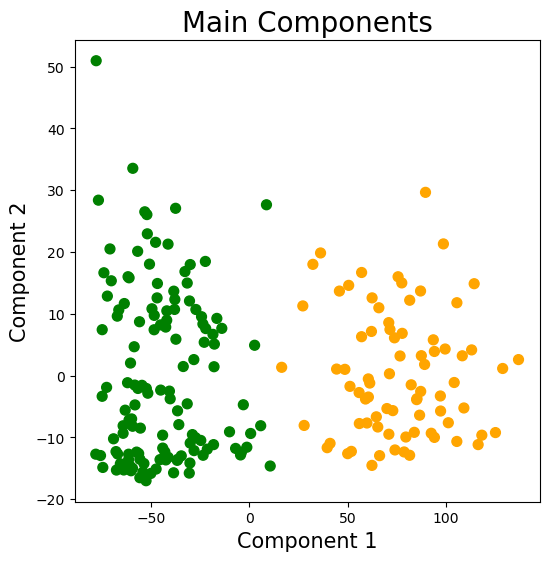

In [31]:
# Ploting the clusters using the main components method to demonstrate there’s no overlap in the clusters 
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Main Components', fontsize = 20)

color_theme2 = np.array(["orange","green"])
ax.scatter(
    x=pca2_nombres_stroke.Componente_1, 
    y=pca2_nombres_stroke.Componente_2,
    c=color_theme2[pca2_nombres_stroke.KMeans_Clusters2],
    s=50)
plt.show()
#plt.savefig('./data/KMeans_Clusters.png')

### Creating a data frame to compare the Clusters

In [47]:
# Creating a data fram containing means for each cluster
Cluster1 = new_data_non_categorical_stroke[new_data_non_categorical_stroke.KMeans_Clusters2==1]
Clust1 = pd.DataFrame(Cluster1.mean().round(2))
Clust1_renamed = Clust1.rename({0:'Cluster 1'},axis=1)

Cluster2 = new_data_non_categorical_stroke[new_data_non_categorical_stroke.KMeans_Clusters2==0]
Clust2 = pd.DataFrame(Cluster2.mean().round(2))
Clust2_renamed = Clust2.rename({0:'Cluster 2'},axis=1)

# Merging both data frames
Clust_compare = pd.merge(Clust1_renamed,Clust2_renamed,how="outer",left_index=True,right_index=True)

# Creating a data fram containing means for Non Stroke Patients
Non_stroke_db = data_non_categorical[data_non_categorical.stroke==0]
Non_stroke = pd.DataFrame(Non_stroke_db.mean().round(2))
Non_stroke_avg = Non_stroke.rename({0:'Non Stroke'},axis=1)

# Merging all 3 Data Sets together
Clust_compare_final = pd.merge(Clust_compare,Non_stroke_avg,how="inner",left_index=True,right_index=True)

# Trasposing the data frame to better fit into an slide
Compare_horizontal = Clust_compare_final.drop(['id']).T
Compare_horizontal 

# Generating a CSV file to import into the presentation
#Compare_horizontal.to_csv('./data/stroke_compare.csv')

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,Govt_job,Private,Self-employed,children,Female,Male,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
Cluster 1,66.67,0.23,0.14,0.86,90.17,28.94,0.13,0.58,0.28,0.01,0.61,0.39,0.48,0.52,0.16,0.26,0.40,0.18
Cluster 2,69.49,0.38,0.29,0.95,210.69,33.10,0.14,0.65,0.21,0.00,0.52,0.48,0.47,0.53,0.10,0.30,0.40,0.19
Non Stroke,41.76,0.08,0.04,0.64,104.00,28.82,0.13,0.57,0.15,0.14,0.59,0.41,0.49,0.51,0.31,0.17,0.38,0.15


## Conclusion

WCSS is an indicator of how similar are the individuals within the clusters
The value of WCSS stopped the drastical diminish at cluster  #2 thus this is the optimal number of clusters

We used the Main components method to demonstrate there’s no overlap in the clusters 

We compared the variables similarities and differences between clusters of patients that had suffered a stroke and also the patients without stroke to identify ranges, maximum values and possible main risk factors

As initial observation we see that patients above 66-69 years old who has suffered hypertension and / or heart dis ease,married with glucose level around 210 showed more propensity to stroke

In order to get more accurate conclusions let’s analyze each variable separately

In [16]:
import pandas as pd


In [289]:
data_new = pd.read_csv('./data/dataset_stroke.csv')
data_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
3,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
4904,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
4905,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
4906,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


In [290]:
#table with just the number of strokes
stroke = data_new[data_new['stroke']==1]

# Is smoking a key factor in increasing the probability of having a stroke?

In [291]:
#checking the smoking status 
data_new['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [292]:
#we are going to filter out the "unknown" status because it is uncertain if does patients smoke or not 
smoking = data_new[data_new['smoking_status']!='Unknown']
smoking


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
5,156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0
7,187,Female,20.0,0,0,No,Private,Rural,84.07,27.6,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4898,72824,Male,46.0,0,0,Yes,Private,Rural,59.05,28.3,formerly smoked,0
4900,72861,Female,52.0,0,0,Yes,Private,Urban,69.30,20.1,never smoked,0
4902,72882,Male,47.0,0,0,Yes,Private,Rural,75.30,25.0,formerly smoked,0
4903,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0


In [293]:
import matplotlib.pyplot as plt

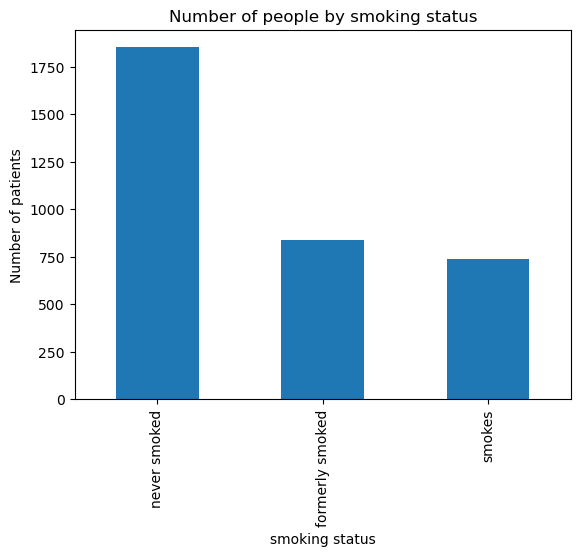

In [294]:
#bar plot for better data visualization
smoking['smoking_status'].value_counts().plot(kind='bar',title='Number of people by smoking status',ylabel='Number of patients', xlabel='smoking status')
#plt.savefig('./data/smoking.png')
plt.show()

In this plot, we can notice that there are more people who don´t smoke, than the ones who are smoking or that smoked, 1852 patients have never smoked, which corresponds to a 54% of the total patients (3425), the rest of the patients, 836 formerly smoked and 737, almost half of the people in this study have ever smoke in their life. It is important to know if this can be a key factor due to the large number of patients this bad habit could cause in their health. 

In [295]:
#compare the smoking status and stroke 
smoking.groupby('stroke')['smoking_status'].value_counts()

stroke  smoking_status 
0       never smoked       1768
        formerly smoked     779
        smokes              698
1       never smoked         84
        formerly smoked      57
        smokes               39
Name: smoking_status, dtype: int64

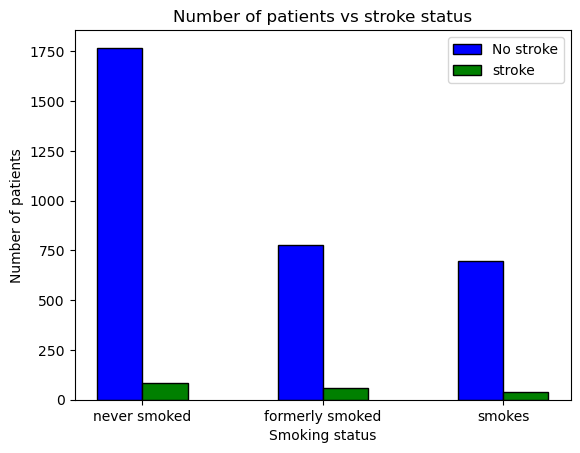

In [296]:
#visual comparation
import numpy as np
stroke_no=[1768,779,698]
stroke_ye=[84,57,39]

n=3
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, stroke_no, color = 'b',
        width = width, edgecolor = 'black',
        label='No stroke')
plt.bar(r + width, stroke_ye, color = 'g',
        width = width, edgecolor = 'black',
        label='stroke')
  
plt.xlabel("Smoking status")
plt.ylabel("Number of patients")
plt.title("Number of patients vs stroke status")
  

plt.xticks(r + width/2,['never smoked','formerly smoked','smokes'])
plt.legend()
#plt.savefig('./data/smoking_status.png')
plt.show()

The plot above shows the patients with the 3 different smoking statuses, in blue are the patients who didn´t have a stroke, and in green are the ones that have. Even though the amount of stroke patients is minimum we can see that there is a difference between the proportions in each case.

In [297]:
#This table compares the total of patients en each smoking status with the number of patients who had a stroke

smoking_stroke = pd.DataFrame({
    'smoking status': ['never smoked','formerly smoked','smokes'],
    'total number of patients': [1852,836,737],
    'number of patients who had a stroke':[84,57,39]
})
smoking_stroke['% of patients who had a stroke']= (smoking_stroke['number of patients who had a stroke']/smoking_stroke['total number of patients'])*100
smoking_stroke['% patients who had a stroke/total patientes who had a stroke']=(smoking_stroke['number of patients who had a stroke']/180)*100

smoking_stroke 

,smoking status,total number of patients,number of patients who had a stroke,% of patients who had a stroke,% patients who had a stroke/total patientes who had a stroke
0,never smoked,1852,84,4.535637,46.666667
1,formerly smoked,836,57,6.818182,31.666667
2,smokes,737,39,5.291723,21.666667


The table above shows the difference between the percentages of patients who got a stroke with a smoking history and the ones who didn´t smoke, which is too low. Also, 46% of the patients that had a stroke never smoked and 54% smoked or are smoking, in this case, the gap is minimum too. Of the whole number of patients who never smokes only 4.53% had a stroke, for the patients who formerly smoked, 6.8% had a stroke and 5.29% of patients who smoke had a stroke. As we can see, these percentages are not relevant enough to say that smoking could be a "key factor for having a stroke", never the less, we do consider smoking as a factor that could give you more chances of getting a stroke.

In [298]:
smoke_hy=pd.crosstab(smoking['stroke'], smoking['smoking_status'])
smoke_hy

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,779,1768,698
1,57,84,39


In [299]:
#Hypotesis test
#H0 = Independence (stroke is independent of smoking status)
#H1 = Not independen (stroke is not independent of smoking status)
alpha = .05

In [300]:
from scipy.stats import chi2_contingency

In [301]:
p_value = chi2_contingency(smoke_hy).pvalue
if p_value > alpha:
    print("We have a lot of evidence to support H0 (i.e. we failed to reject H0)")
else:
    print("we reject H0")

we reject H0


Finally, according to the hypothesis test, with 95% of confidence, we reject that the strokes are independent of the smoking status.

Is smoking a key factor in increasing the probability of having a stroke?

Answer: No, a Key factor means all relevant elements or reasons and according to the table analysis, smoking is not a key factor in increasing the probability of having a stroke, due to the historically smoking patient's low percentages of having a stroke. But according to the hypothesis test and the analysis, smoking is a factor that can increase a little the probability of having a stroke

# Is having a heart disease and/or hypertension considered as risk factor?

In [302]:
#Visualizing the data of herat disease and hypertension
hyper = data_new['hypertension'].value_counts()
hyper

0    4457
1     451
Name: hypertension, dtype: int64

In [303]:
heart = data_new['heart_disease'].value_counts()
heart

0    4665
1     243
Name: heart_disease, dtype: int64

In [304]:
stroke = data_new['stroke'].value_counts()
stroke


0    4699
1     209
Name: stroke, dtype: int64

In [305]:
#patientes who had a stroke and hypertension
data_new.groupby('hypertension')['stroke'].value_counts()

hypertension  stroke
0             0         4308
              1          149
1             0          391
              1           60
Name: stroke, dtype: int64

In [306]:
#patientes who had a stroke and heart_disease
data_new.groupby('heart_disease')['stroke'].value_counts()

heart_disease  stroke
0              0         4496
               1          169
1              0          203
               1           40
Name: stroke, dtype: int64

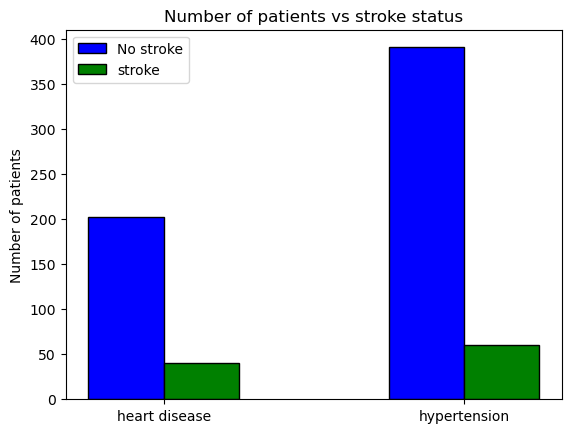

In [307]:
#viusal representation
stroke_no=[203,391]
stroke_ye=[40,60]

n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, stroke_no, color = 'b',
        width = width, edgecolor = 'black',
        label='No stroke')
plt.bar(r + width, stroke_ye, color = 'g',
        width = width, edgecolor = 'black',
        label='stroke')
  

plt.ylabel("Number of patients")
plt.title("Number of patients vs stroke status")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['heart disease','hypertension'])
plt.legend()
#plt.savefig('./data/heart_status.png')
plt.show()

There are 4982 patients in total, 9.81% have hypertension and 4.95% have heart disease.  In this graph we can see just the number of patients with these conditions, these patients are divided into two columns, the blue ones are the patients that didn´t have a stroke, and in green are the ones that had. We can see that just a few of them had a stroke, we are going to compare these results in percentages for better understanding. 


In [308]:
#patientes with heart disease and hypetension 
heart_hy = data_new.loc[(data_new['heart_disease']==1)&(data_new['hypertension']==1)]

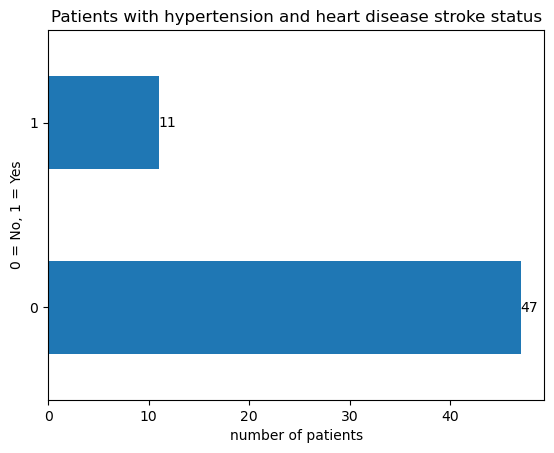

In [309]:
bar_plot = heart_hy['stroke'].value_counts().plot(kind='barh', title='Patients with hypertension and heart disease stroke status',ylabel='0 = No, 1 = Yes', xlabel='number of patients')
bar_plot.bar_label(bar_plot.containers[0])
#plt.savefig('./data/heart_and_hyper.png')
plt.show()

In this plot we observe that only 58 patients have hypertension and heart disease, what we found interesting is that 11 had a stroke. We consider that as a significant amount because almost 19% of the patients with these diseases had a stroke and in general just 4% of all the patients in the study had a stroke.

In [310]:
#patients who don´t have hypertencion nor heart disease
noneh = data_new.loc[(data_new['heart_disease']==0)&(data_new['hypertension']==0)]
noneh['stroke'].value_counts()

0    4152
1     120
Name: stroke, dtype: int64

In [311]:
#Data frame for compareing the data 
heart_stroke = pd.DataFrame({
    'Disease': ['Hypertension', 'Heart Disease', 'Both','None'],
    'total number of patients': [451,243,58,4152],
    'number of patients who had a stroke':[60,40,11,120]
})
heart_stroke['% of patients who had a stroke']= (heart_stroke['number of patients who had a stroke']/heart_stroke['total number of patients'])*100


heart_stroke 

,Disease,total number of patients,number of patients who had a stroke,% of patients who had a stroke
0,Hypertension,451,60,13.303769
1,Heart Disease,243,40,16.460905
2,Both,58,11,18.965517
3,None,4152,120,2.890173


In this table, we can compare patients that have heart disease, hypertension, both or none with the patients that had a stroke, in order, to understand the impact each disease had on the number of strokes that occurred. After analyzing this data. First, we can see that just 2.8% of all the patients with none of these diseases had a stroke, in comparison with 18.9% of the patients that had both diseases, 16.46% only had heart disease and 13.30% of patients that had a stroke also had Hypertension. 

To answer the question is important to mention what is a risk factor, risk factors are characteristics at the biological, psychological, family, community, or cultural level that precede and are associated with a higher likelihood of negative outcomes. Having is in mind we conclude that indeed having Hypertension and/or heart disease will increase the chances of someone having a stroke. 

# What percentage of the patients in the sample have suffered a stroke?

In [312]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt

stroke_df = pd.read_csv('./data/dataset_stroke.csv')
percentage = 100*len(stroke_df[stroke_df['stroke']==1])/len(stroke_df)
print(f'The percentage of people to suffer a stroke was: {percentage:.2f}%')

The percentage of people to suffer a stroke was: 4.26%


In [313]:
#get if a patient suffered a stroke or not
stroke_df['stroke'] == 1

0       False
1       False
2       False
3       False
4       False
        ...  
4903    False
4904    False
4905    False
4906     True
4907    False
Name: stroke, Length: 4908, dtype: bool

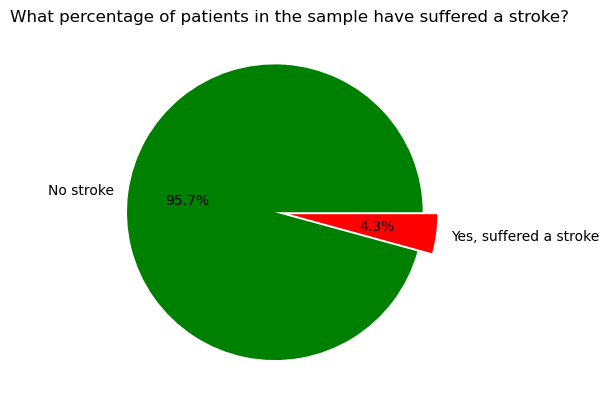

In [314]:
# import dependencies for graphing
import matplotlib.pyplot as plt

#pie chart for graphing plot
x_value = ['No stroke','Yes, suffered a stroke']
y_value = [100-percentage,percentage]
plt.pie(y_value, labels=x_value,autopct='%1.1f%%',colors=['green','red'], explode=[0.1,0])
plt.title('What percentage of patients in the sample have suffered a stroke?')

# save plot as image and show in notebook
plt.savefig('./data/percentage_total_stroke.png', dpi=200)
plt.show()



From the patients population we found that 4.3% of individuals have suffered a stroke.

# Which gender is more likely to have a stroke?

In [315]:
# import dependency
import pandas as pd

#read csv file and get the gender dataframe
gender_df = pd.read_csv('./data/dataset_stroke.csv')
gender_df = gender_df.replace({0: 'No', 1: 'Yes'})
gender_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,77,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,No
1,84,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
2,91,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
3,99,Female,31.0,No,No,No,Private,Urban,108.89,52.3,Unknown,No
4,129,Female,24.0,No,No,No,Private,Urban,97.55,26.2,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,72911,Female,57.0,Yes,No,Yes,Private,Rural,129.54,60.9,smokes,No
4904,72914,Female,19.0,No,No,No,Private,Urban,90.57,24.2,Unknown,No
4905,72915,Female,45.0,No,No,Yes,Private,Urban,172.33,45.3,formerly smoked,No
4906,72918,Female,53.0,Yes,No,Yes,Private,Urban,62.55,30.3,Unknown,Yes


In [316]:
# do a value count to get the total number of Female and Male patients
gender_df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [317]:
# count of population that suffered a stroke or not
gender_counts = gender_df.groupby('gender')['stroke'].value_counts()
gender_counts

gender  stroke
Female  No        2777
        Yes        120
Male    No        1922
        Yes         89
Name: stroke, dtype: int64

In [318]:
# group by gender and get the percentage of strokes
gender_df = gender_df[['gender','stroke']]
gender_counts = gender_df.groupby('gender')['stroke'].value_counts()
gender_percentages = gender_counts.groupby(level=0, group_keys=False).apply(lambda x: 100 * x / float(x.sum()))
gender_percentages

gender  stroke
Female  No        95.857784
        Yes        4.142216
Male    No        95.574341
        Yes        4.425659
Name: stroke, dtype: float64

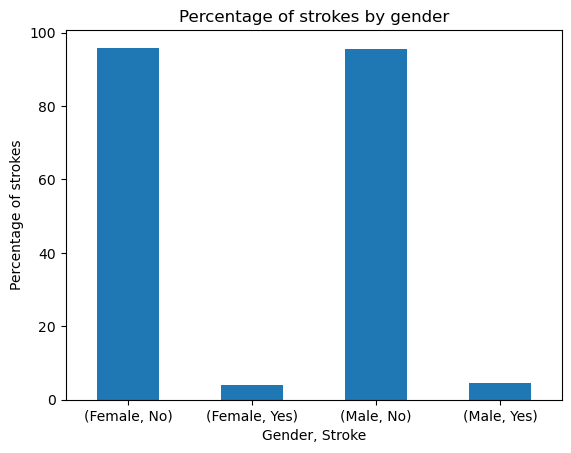

In [319]:
#graph using bar plot
gender_percentages.plot.bar(rot=0, xlabel='Gender, Stroke', ylabel='Percentage of strokes', title='Percentage of strokes by gender')

# save plot as image and show in notebook
plt.savefig('./data/percentage_stroke_gender.png', dpi=200)
plt.show()

In [320]:
sex_table_df = pd.crosstab(gender_df['gender'], gender_df['stroke'])
sex_table_df

stroke,No,Yes
gender,,
Female,2777,120
Male,1922,89


In [321]:
# import dependency for hyptesis testing
from scipy.stats import chi2_contingency

# Perform the chi-square test
res = chi2_contingency(sex_table_df)
p_value = res.pvalue
print(f'p_value = {p_value}')

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to suggest that women are more likely to have a stroke than men.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not sufficient evidence to support the claim that women are more likely to have a stroke than men.")

p_value = 0.6805108914997836
Fail to reject the null hypothesis
There is not sufficient evidence to support the claim that women are more likely to have a stroke than men.


There is not sufficient evidence to support the claim that women are more likely to have a stroke than men